# 集成学习

吴雅妃 2210515003 房美贤 2210515014

Github: https://github.com/Finorita/Machine-Learning/blob/main/hw_ensemble.ipynb


In [108]:
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import mpl_toolkits.mplot3d  # noqa: F401
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from scipy.sparse import csr_matrix # 导入scipy.sparse模块
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier 
dt = DecisionTreeClassifier()
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier



### 1. 数据集
**数据的基本信息**

iris 数据集，包含了 150 个样本，每个样本有四个特征：花瓣长度、花瓣宽度、萼片长度、萼片宽度 和一个标签用于表示鸢尾花的种类：setosa、versicolor、virginica。

In [109]:
iris = load_iris()
X = iris.data # features
y = iris.target # labels
print('鸢尾花的种类分别为：{}'.format(iris['target_names']))
print('鸢尾花的特征分别为：{}'.format(iris['feature_names']))

鸢尾花的种类分别为：['setosa' 'versicolor' 'virginica']
鸢尾花的特征分别为：['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


**数据的统计信息**

In [110]:
X_df = pd.DataFrame(X, columns=iris.feature_names)
X_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


**数据可视化**

绘制出数据集在前三个特征的三维视图。

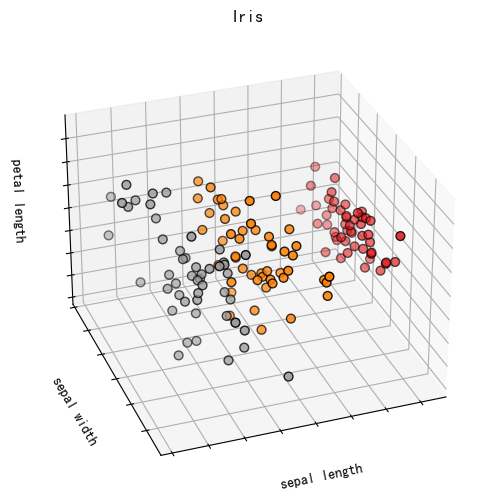

In [111]:
# To getter a better understanding of interaction of the dimensions
# plot the first three PCA dimensions
fig = plt.figure(1, figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d", elev=-150, azim=110)

X_reduced = PCA(n_components=3).fit_transform(iris.data)
ax.scatter(
    X_reduced[:, 0],
    X_reduced[:, 1],
    X_reduced[:, 2],
    c=y,
    cmap=plt.cm.Set1,
    edgecolor="k",
    s=40, 
)
ax.set_title("Iris")
ax.set_xlabel("sepal length")
ax.xaxis.set_ticklabels([])
ax.set_ylabel("sepal width")
ax.yaxis.set_ticklabels([])
ax.set_zlabel("petal length")
ax.zaxis.set_ticklabels([])
plt.show()

### 2. 数据预处理
标准化数据和划分数据集。

**标准化数据**

保证每个维度的特征数据方差为1，均值为0，使得预测结果不会被某些维度过大的特征值而主导。
首先将训练集和测试集提前分开，再分别进行预处理，训练集预处理时进行标准化时，保存好训练集的均值和方差。测试集利用刚保存的训练集的均值和方差进行标准化。

In [112]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3, random_state=19)
# 将特征缩放成均值为0，方差为1
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

发现：在使用random_state = 42时，后续所有的学习在测试集上的准确率都能达到100%。为了便于后续进行不同的模型的分析，选用不能达到100%的random_state。

### 3. 分类
分别使用 **lr** 和 **svm** 进行分类

In [113]:
# lr
lr = LogisticRegression()
lr.fit(X_train, Y_train)
y_predtrain_lr = lr.predict(X_test)
y_predtest_lr2 = lr.predict(X_train)
lr_test=accuracy_score(Y_test, y_predtrain_lr)
lr_train = accuracy_score(Y_train, y_predtest_lr2)

# svm
svm = SVC()
svm.fit(X_train, Y_train)
y_pred_svm = svm.predict(X_test)
y_pred_svm2 = svm.predict(X_train)

svm_test=accuracy_score(Y_test, y_pred_svm)
svm_train = accuracy_score(Y_train, y_predtest_lr2)

print('lr 的分类结果:',y_predtrain_lr)
print('在测试集上的准确率:',lr_test)
print('在训练集上的准确率:',lr_train)

print(" ")

print('svm的分类结果:',y_pred_svm)
print('在测试集上的准确率:',svm_test)
print('在训练集上的准确率:',svm_train)


lr 的分类结果: [0 2 1 1 0 0 0 0 1 2 1 0 1 0 2 0 2 0 1 0 1 1 1 1 2 1 2 1 1 2 0 1 1 1 1 0 0
 0 2 2 1 2 1 2 2]
在测试集上的准确率: 0.9333333333333333
在训练集上的准确率: 0.9714285714285714
 
svm的分类结果: [0 2 1 1 0 0 0 0 1 2 1 0 1 0 2 0 2 0 1 0 1 1 1 1 2 1 2 1 1 2 0 1 1 1 1 0 0
 0 2 2 1 2 1 2 2]
在测试集上的准确率: 0.9333333333333333
在训练集上的准确率: 0.9714285714285714


### 4. Bagging
使用决策树作为基学习器，并给出在包外估计下的性能指标。

In [114]:
# 使用带有10棵决策树的集成学习器
bag = BaggingClassifier(dt, n_estimators=10, oob_score=True)
bag.fit(X_train, Y_train)

# 获得包外估计得分
oob_score = bag.oob_score_
print(f"包外得分: {oob_score}")
y_pred_bag = bag.predict(X_test)

# 在测试集中设置性能指标
acc_bag = accuracy_score(Y_test, y_pred_bag)
pre_bag = precision_score(Y_test, y_pred_bag, average='macro')
rec_bag = recall_score(Y_test, y_pred_bag, average='macro')
f1_bag = f1_score(Y_test, y_pred_bag, average='macro')
print(f"测试集的性能指标:")
print(f"Accuracy: {acc_bag}")
print(f"Precision: {pre_bag}")
print(f"Recall: {rec_bag}")
print(f"F1-score: {f1_bag}")

包外得分: 0.9428571428571428
测试集的性能指标:
Accuracy: 0.9333333333333333
Precision: 0.9473684210526315
Recall: 0.9333333333333332
F1-score: 0.9343915343915343


### 5. Boosting
基学习器为决策树，利用sklearn中AdaBoost与GBDT实现分类。

In [115]:
# 集成十颗决策树的AdaBoost算法
ada = AdaBoostClassifier(dt, n_estimators=10)
ada.fit(X_train, Y_train)
y_pred_ada = ada.predict(X_test)
acc_ada = accuracy_score(Y_test, y_pred_ada)
pre_ada = precision_score(Y_test, y_pred_ada, average='macro')
rec_ada = recall_score(Y_test, y_pred_ada, average='macro')
f1_ada = f1_score(Y_test, y_pred_ada, average='macro')
print(f"测试集的AdaBoost集成性能指标:")
print(f"Accuracy: {acc_ada}")
print(f"Precision: {pre_ada}")
print(f"Recall: {rec_ada}")
print(f"F1-score: {f1_ada}")

print(" ")
# 集成十颗决策树的GBDT算法
gbdt = GradientBoostingClassifier(n_estimators=10)
gbdt.fit(X_train, Y_train)
y_pred_gbdt = gbdt.predict(X_test)
acc_gbdt = accuracy_score(Y_test, y_pred_gbdt)
pre_gbdt = precision_score(Y_test, y_pred_gbdt, average='macro')
rec_gbdt = recall_score(Y_test, y_pred_gbdt, average='macro')
f1_gbdt = f1_score(Y_test, y_pred_gbdt, average='macro')
print(f"测试集的GBDT集成性能指标:")
print(f"Accuracy: {acc_gbdt}")
print(f"Precision: {pre_gbdt}")
print(f"Recall: {rec_gbdt}")
print(f"F1-score: {f1_gbdt}")

测试集的AdaBoost集成性能指标:
Accuracy: 0.9333333333333333
Precision: 0.9473684210526315
Recall: 0.9333333333333332
F1-score: 0.9343915343915343
 
测试集的GBDT集成性能指标:
Accuracy: 0.9333333333333333
Precision: 0.9473684210526315
Recall: 0.9333333333333332
F1-score: 0.9343915343915343


### 6、随机森林
使用sklearn实现随机森林


In [116]:
# 使用集成10棵树和默认参数的随机森林
rf_default = RandomForestClassifier(n_estimators=10)
rf_default.fit(X_train,Y_train)
y_pred_rf_default = rf_default.predict(X_test)
acc_rf_default = accuracy_score(Y_test,y_pred_rf_default)
pre_rf_default = precision_score(Y_test,y_pred_rf_default ,average='macro')
rec_rf_default= recall_score(Y_test,y_pred_rf_default ,average='macro')
f1_rf_default= f1_score(Y_test,y_pred_rf_default ,average='macro')
print(f"RandomG集成性能指标(n_estimators=10):")
print(f"Accuracy: {acc_rf_default}")
print(f"Precision: {pre_rf_default}")
print(f"Recall: {rec_rf_default}")
print(f"F1-score: {f1_rf_default}")
print(" ")

# 使用集成20棵树和默认参数的随机森林
rf_more_trees = RandomForestClassifier(n_estimators=20)
rf_more_trees.fit(X_train,Y_train)
y_pred_rf_more_trees= rf_more_trees.predict(X_test)
acc_rf_more_trees= accuracy_score(Y_test,y_pred_rf_more_trees )
pre_rf_more_trees= precision_score(Y_test,y_pred_rf_more_trees ,average='macro')
rec_rf_more_trees= recall_score(Y_test,y_pred_rf_more_trees ,average='macro')
f1_rf_more_trees= f1_score(Y_test,y_pred_rf_more_trees ,average='macro')

print(f"RandomG集成性能指标(n_estimators=20):")
print(f"Accuracy: {acc_rf_more_trees}")
print(f"Precision: {pre_rf_more_trees}")
print(f"Recall: {rec_rf_more_trees}")
print(f"F1-score: {f1_rf_more_trees}")
print(" ")

# n_estimators=10 and sqrt features for each tree 
rf_sqrt_features= RandomForestClassifier(n_estimators=10,max_features="sqrt")
rf_sqrt_features.fit(X_train,Y_train)
y_pred_rf_sqrt_features= rf_sqrt_features.predict(X_test)
acc_rf_sqrt_features= accuracy_score(Y_test,y_pred_rf_sqrt_features )
pre_rf_sqrt_features= precision_score(Y_test,y_pred_rf_sqrt_features ,average='macro')
rec_rf_sqrt_features= recall_score(Y_test,y_pred_rf_sqrt_features ,average='macro')
f1_rf_sqrt_features= f1_score(Y_test,y_pred_rf_sqrt_features ,average='macro')

print(f"RandomG集成性能指标(n_estimators=10 and sqrt features for each tree ):")
print(f"Accuracy: {acc_rf_sqrt_features}")
print(f"Precision: {pre_rf_sqrt_features}")
print(f"Recall: {rec_rf_sqrt_features}")
print(f"F1-score: {f1_rf_sqrt_features}")
print(" ")

# 使用集成20棵树的随机森林
rf_20_trees = RandomForestClassifier(n_estimators=20,max_features="sqrt")
rf_20_trees.fit(X_train,Y_train)
y_pred_rf_20_trees= rf_20_trees.predict(X_test)
acc_rf_20_trees= accuracy_score(Y_test,y_pred_rf_20_trees )
pre_rf_20_trees= precision_score(Y_test,y_pred_rf_20_trees ,average='macro')
rec_rf_20_trees= recall_score(Y_test,y_pred_rf_20_trees ,average='macro')
f1_rf_20_trees= f1_score(Y_test,y_pred_rf_20_trees ,average='macro')

print(f"RandomG集成性能指标(n_estimators=20 and sqrt features for each tree )):")
print(f"Accuracy: {acc_rf_20_trees}")
print(f"Precision: {pre_rf_20_trees}")
print(f"Recall: {rec_rf_20_trees}")
print(f"F1-score: {f1_rf_20_trees}")
print(" ")


RandomG集成性能指标(n_estimators=10):
Accuracy: 0.9333333333333333
Precision: 0.9473684210526315
Recall: 0.9333333333333332
F1-score: 0.9343915343915343
 
RandomG集成性能指标(n_estimators=20):
Accuracy: 0.9333333333333333
Precision: 0.9369747899159663
Recall: 0.9347222222222222
F1-score: 0.9352142110762801
 
RandomG集成性能指标(n_estimators=10 and sqrt features for each tree ):
Accuracy: 0.9333333333333333
Precision: 0.9473684210526315
Recall: 0.9333333333333332
F1-score: 0.9343915343915343
 
RandomG集成性能指标(n_estimators=20 and sqrt features for each tree )):
Accuracy: 0.9555555555555556
Precision: 0.9629629629629629
Recall: 0.9555555555555556
F1-score: 0.9565826330532213
 


通过观察上面的性能指标，发现当参数选择为**n_estimators=20 and sqrt features for each tree**时，性能有了提升，在提升学习性能的过程中，扩大随机森林的学习器规模同时也需要考虑学习器对特征的选择/处理过程。


**特征重要性**

下面使用集成10棵树+默认参数的随机森林在数据集上的训练结果，观察特征的重要性。

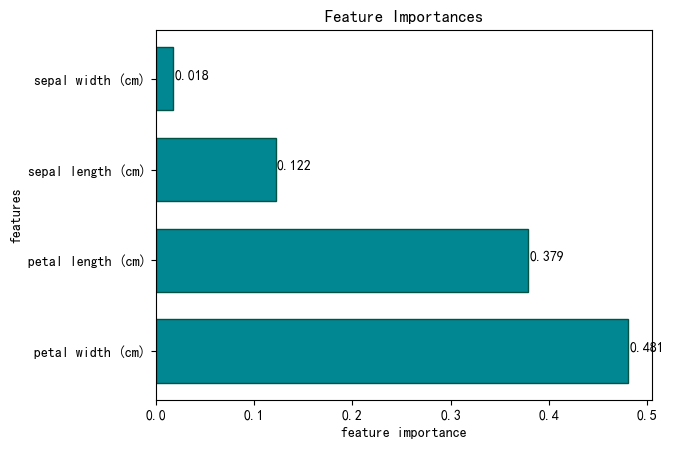

In [117]:
# 转换成DataFrame对象，并指定列名
data = pd.DataFrame(X_train, columns=iris.feature_names)
target = pd.DataFrame(Y_train, columns=['target'])
# 获取特征重要性分数
feature_importance = pd.DataFrame(data.columns, columns=['feature'])
feature_importance['importance'] = rf_default.feature_importances_
# 对特征重要性分数进行排序
feature_importance.sort_values('importance', ascending=False, inplace=True)
# 绘制水平柱状图
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.barh(feature_importance['feature'], feature_importance['importance'], height=0.7, color ='#008792', edgecolor ='#005344') # 更多颜色可参见颜色大全
plt.xlabel('feature importance') # x 轴标签
plt.ylabel('features') # y轴标签
plt.title('Feature Importances') # 标题
for a,b in zip(feature_importance['importance'],feature_importance['feature']): # 添加数字标签
    plt.text(a+0.001, b,'%.3f'%float(a)) # a+0.001代表标签位置在柱形图上方0.001处
plt.show()

由图可知，**Petal length** 和 **Petal width** 是最重要的两个特征，下面结合降维的方法观察。

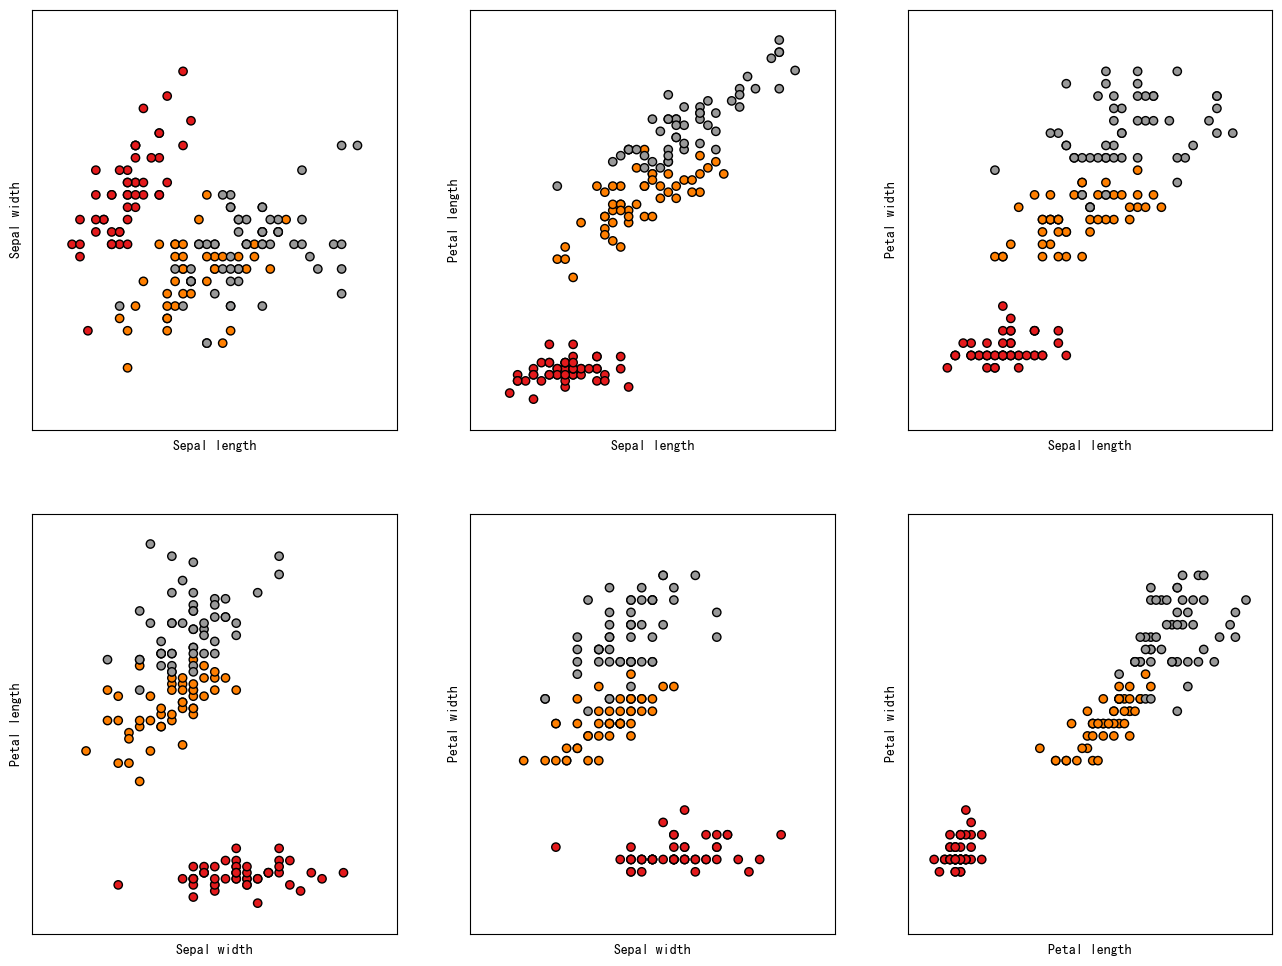

In [118]:
# 定义一个函数，用于绘制散点图
def plot_scatter(X, xlabel, ylabel):
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1, edgecolor="k")
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xticks(())
    plt.yticks(())

# 定义六个数据集
X1 = iris.data[:, [0,1]]  # we only take the first two features.
X2 = iris.data[:, [0,2]]  # we only take the first and the third features.
X3 = iris.data[:, [0,3]]  # we only take the first and the fourth features.
X4 = iris.data[:, [1,2]]  # we only take the second and the third features.
X5 = iris.data[:, [1,3]]  # we only take the second and the fourth features.
X6 = iris.data[:, [2,3]]  # we only take the third and the fourth features.

# 创建一个新的图形对象，并设置它的大小为16*12英寸
plt.figure(figsize=(16, 12))
plt.clf()

# 在图形对象中绘制六个子图，每个子图对应一个数据集
plt.subplot(2, 3, 1) # 第一行第一列的子图
plot_scatter(X1, "Sepal length", "Sepal width")

plt.subplot(2, 3, 2) # 第一行第二列的子图
plot_scatter(X2, "Sepal length", "Petal length")

plt.subplot(2, 3, 3) # 第一行第三列的子图
plot_scatter(X3, "Sepal length", "Petal width")

plt.subplot(2, 3, 4) # 第二行第一列的子图
plot_scatter(X4, "Sepal width", "Petal length")

plt.subplot(2, 3, 5) # 第二行第二列的子图
plot_scatter(X5, "Sepal width", "Petal width")

plt.subplot(2, 3, 6) # 第二行第三列的子图
plot_scatter(X6, "Petal length", "Petal width")



发现使用特征 **Petal width** 和 **Petal length** 很容易能区分出 **setosa** 这一品种的鸢尾花，并且在这两种特征下其余两种花也有相对明显的界限，与上述结果吻合。

### 7. 总结 

**1. Bagging————并行式集成学习的代表**

**基本概念**

Bagging是直接基于自助采样法(bootstrap sampling)采样出T个含m个训练样本的采样集，接着基于每个采样集训练出一个基学习器，再将这些基学习器进行结合。

**特点**

1. Bagging中基学习器的多样性，仅通过样本扰动而来。Bagging主要关注降低方差，提高模型的稳定性和泛化能力，避免过拟合，因此在不剪枝的决策树、神经网络等易受样本扰动的学习器上效用更明显。
2. 与Adaboost只适用于二分类任务不同，Bagging可以不经修改地用于多分类、回归等任务。

**2. Boosting————个体学习器间存在强依赖关系，必须串行生成的序列化方法。**

**基本概念**

其工作机制是先从初始训练集训练出一个基学习器，再根据基学习器的表现对样本分布进行调整，使得先前基学习器做错的训练样本在后续受到更多的关注，然后基于调整后的样本分布来训练下一个基学习器，如此重复进行，直至基学习器数目达到事先给定的值，最后将这些基学习器进行加权结合。

**代表算法** AdaBoost

**特点**
1. Boosting够提升弱分类器性能，降低偏差，避免欠拟合，它不能显著地降低方差。原因：Boosting在训练好一个弱分类器后，需要计算弱分类器的错误或者残差，作为下一个分类器的输入。这个过程本身就是在不断减小损失函数，使得模型偏差不断降低，提升了弱分类器的性能。Boosting的过程并不会显著降低方差。这是因为Boosting的训练过程使得各弱分类器之间是强相关的，缺乏独立性，所以并不会对降低方差有作用。

**3. 随机森林RF————Bagging的扩展变体**

**基本概念**

RF在以决策树为基学习器构建的Bagging集成的基础上，进一步在决策树的训练过程中引入了随机属性选择。

**随机属性选择**

对基决策树的每个结点，先从该结点的属性集合中随机选择一个包含k个属性的子集，然后再从这个子集中选择一个最优属性用于划分，这里的参数k控制了随机性的引入程度，如果令k=当前结点属性子集个数d，基决策树的构建就与传统决策树相同，一般推荐值：k=log2d。传统决策树在选择划分属性时，是在当前结点的属性集合中选择一个最优属性。

**特点**
1. 随机森林使用自助采样法（bootstrap sampling）从原始数据集中生成多个训练集，每个训练集用来训练一个决策树。
2. 随机森林在每个节点分裂时，从所有特征中随机选择一部分特征，然后从这些特征中选择最佳的特征来分裂节点。这样可以增加树的多样性，降低树之间的相关性。
3. 随机森林不对决策树进行剪枝，而是通过集成多个决策树来降低过拟合风险。
4. 随机森林可以使用袋外样本（out-of-bag samples）来评估模型的泛化能力，无需额外的验证集或交叉验证。
5. 随机森林可以判断特征的重要性，通过计算每个特征在决策树中的平均信息增益或平均基尼指数。

**比较**

1. 多样性：
Bagging中基学习器的多样性，仅通过样本扰动而来。
随机森林中基学习器的多样性不仅来自样本扰动，还来自属性扰动，这就使得最终集成的泛化性能可通过个体学习器之间差异度的增加而进一步提升。

2. 收敛性：
随机森林的收敛性与Bagging相似。
随机森林的起始性能往往相对比较差，尤其是集成中只包含一个基学习器时。（这是因为通过引入属性扰动随机森林中，个体学习器的性能往往有所降低）而随着个体学习器数目的增加，随机森林通常会收敛到更低的泛化误差。

3. 训练效率：
随机森林的训练效率常优于Bagging，因为在个体决策树的构建过程中，Bagging使用的是确定型决策树，在选择划分属性时，要对结点的所有属性进行考察，而随机森林使用的是随机型决策树，在选择划分属性时，只需考察一个属性子集进行考察。

**4. 学习器结合的好处**

1.	从统计的方面看，由于学习任务的假设空间往往很大，可能有多个假设，在训练集上达到同等性能，此时若使用单学习器，可能因误选而导致泛化性能不佳，结合多个学习器就会减少这一风险。

2.	从计算的方面看，学习算法往往会陷入局部极小，有的局部极小点所对应的泛化性能可能很糟糕，而通过多次运行后进行结合，可降低陷入糟糕局部极小点的风险。

3.	从表示的方面来看，某些学习任务的真实假设可能不在当前学习算法所考虑的假设空间中，此时若使用单学习器肯定无效，而通过结合多个学习器，由于相应的假设空间有所扩大，可能学得更好的近似。




